# Анализ данных о продажах в магазинах Favorita, расположенных в Эквадоре

## Импорт библиотек и подготовка данных

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
stores = pd.read_csv('/content/stores.csv')
transactions = pd.read_csv('/content/transactions.csv')
oil = pd.read_csv('/content/oil.csv')
holidays_events = pd.read_csv('/content/holidays_events.csv')

## Средние ежедневные продажи

In [3]:
train_aux = train[['date', 'sales', 'onpromotion']].groupby('date').mean()
train_aux = train_aux.reset_index()
fig = go.Figure(data=go.Scatter(x=train_aux['date'], y=train_aux['sales'], marker_color='blue', text="sales"))
fig.update_layout({"title": f'Avg Sales by date for all stores and products', "xaxis": {"title":"Date"}, "yaxis": {"title":"Avg Unit Sold"}, "showlegend": False})
fig.show()

* Тренд продаж возрастает
* С июля 2015 по август 2017 тренд продаж стабильный
* Наблюдается семидневная периодичность, в выходные продажи выше
* Первого января магазины не работают, продажи нулевые

## Корреляция между рекламой и продажами

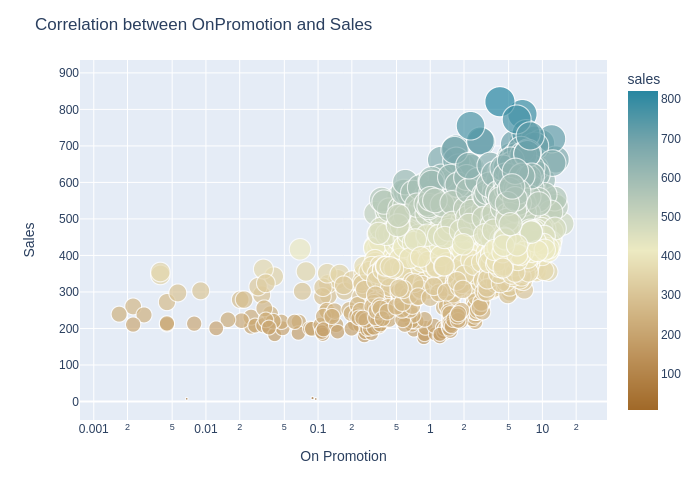

In [4]:
fig = px.scatter(train_aux[train_aux['onpromotion'] > 0], x="onpromotion", y="sales", color='sales', color_continuous_scale="earth", size='sales', log_x=True, size_max=30)
fig.update_layout({"title": f'Correlation between OnPromotion and Sales', "xaxis": {"title":"On Promotion"}, "yaxis": {"title":"Sales"}, "showlegend": False})
fig.show(renderer='png')

* Наблюдается положительная корреляция

## Средние продажи и количество рекламируемых товаров в зависимости от года/месяца/дня недели

In [ ]:
train['year'] = pd.to_datetime(train['date']).dt.year
train['month'] = pd.to_datetime(train['date']).dt.strftime("%B")
train['day_of_week'] = pd.to_datetime(train['date']).dt.day_name()

In [ ]:
df_year_s = train.groupby('year').mean()[['sales']].reset_index()
df_month_s = train.groupby('month').mean()[['sales']].sort_values('sales', ascending=True)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_month_s = df_month_s.reindex(new_order, axis=0).reset_index()
df_day_of_week_s = train.groupby('day_of_week').mean()[['sales']].sort_values('sales', ascending=False)
new_order_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_day_of_week_s = df_day_of_week_s.reindex(new_order_week, axis=0).reset_index()

In [ ]:
df_year = train.groupby('year').mean()[['onpromotion']].reset_index()
df_month = train.groupby('month').mean()[['onpromotion']].sort_values('onpromotion', ascending=True)
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_month = df_month.reindex(new_order, axis=0).reset_index()
df_day_of_week = train.groupby('day_of_week').mean()[['onpromotion']].sort_values('onpromotion', ascending=False)
new_order_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df_day_of_week = df_day_of_week.reindex(new_order_week, axis=0).reset_index()

In [ ]:
fig = make_subplots(rows=3, cols=2, subplot_titles=("Avg Sales by Year", "Avg On Promotion by Year", "Avg Sales by Month","Avg On Promotion by Month", "Avg Sales by Day of Week", "Avg On Promotion by Day of Week"))
fig.append_trace(go.Bar(x=df_year_s['year'], y=df_year_s['sales']), row=1, col=1)
fig.append_trace(go.Bar(x=df_month_s['month'], y=df_month_s['sales']), row=2, col=1)
fig.append_trace(go.Bar(x=df_day_of_week_s['day_of_week'], y=df_day_of_week_s['sales']), row=3, col=1)
fig.append_trace(go.Bar(x=df_year['year'], y=df_year['onpromotion']),row=1, col=2)
fig.append_trace(go.Bar(x=df_month['month'], y=df_month['onpromotion']), row=2, col=2)
fig.append_trace(go.Bar(x=df_day_of_week['day_of_week'], y=df_day_of_week['onpromotion']), row=3, col=2)
fig.update_layout(height=1000, width=1400, title_text="AVERAGE SALES & ONPROMOTION ANALYSIS",  title_font=dict(size=30, color='#8a8d93'), showlegend=False)
fig.show()


* Тренд продаж и рекламы возрастает
* Больше всего покупают в декабре, больше всего рекламируют летом и в декабре
* Больше всего покупают в выходные, больше всего рекламируют в среду и пятницу

## Праздники и события

In [ ]:
holidays_events = holidays_events[(holidays_events['date'] >= "2013-01-01") & (holidays_events['date'] <= "2017-08-15")]

In [ ]:
train_aux = train[['date', 'sales']].groupby('date').mean().reset_index()
fig = go.Figure(data=go.Scatter(x=train_aux['date'], y=train_aux['sales'], marker_color='blue', text="sales"))
for holiday_date in list(holidays_events['date']):
    fig.add_vline(x=holiday_date, line_width=0.5, line_dash="dash", line_color="red")
fig.update_layout({"title": f'Avg Sales by date with Holidays Events', "xaxis": {"title":"Date"}, "yaxis": {"title":"Avg Unit Sold"}, "showlegend": False})
fig.show()

* В течение месяца после землетрясения 16 апреля 2016 наблюдается небольшой рост продаж, выходных было больше, чем обычно

In [ ]:
df_plot = pd.merge(holidays_events, train_aux, on='date', how='inner')
df_plot.loc[df_plot['description'].isin(['Black Friday', 'Cyber Monday']), 'type'] = 'Black Friday and Cyber Monday'

In [ ]:
fig = px.scatter(df_plot, x="date", y="sales", size='sales', color='type')
fig.update_layout({"title": f'Avg Sales on Holiday Events days',"xaxis": {"title":"HOLIDAY EVENT DATE"},"yaxis": {"title":"Avg Sales"},"showlegend": True})
fig.add_annotation(x='2014-07-05', y=500, xref="x", yref="y", text="WORLD CUP", bgcolor="cyan")
fig.add_annotation(x='2016-04-20', y=800, xref="x", yref="y", text="EARTHQUAKE", bgcolor="cyan")
fig.add_annotation(x='2013-12-30', y=0, xref="x", yref="y", text="CHRISTMAS 13/14", bgcolor="cyan")
fig.add_annotation(x='2014-12-30', y=50, xref="x", yref="y", text="CHRISTMAS 14/15", bgcolor="cyan")
fig.add_annotation(x='2015-12-30', y=100, xref="x", yref="y", text="CHRISTMAS 15/16", bgcolor="cyan")
fig.add_annotation(x='2016-12-30', y=150, xref="x", yref="y", text="CHRISTMAS 16/17", bgcolor="cyan")
fig.show()

* Продажи были выше во время чемпионата мира по футболу в Бразилии и после землетрясения
* Продажи выростают во время празднования Рождества и во время Черной пятницы/Кибер понедельника

## Цены на нефть

In [ ]:
train_aux = train[['date', 'sales']].groupby('date').mean()
train_aux = train_aux.reset_index()
fig = go.Figure(data=go.Scatter(x=oil['date'], y=oil['dcoilwtico'],marker_color='blue', text="sales"))
fig.update_layout({"title": f'Oil Prices Chart',"xaxis": {"title":"Date"},"yaxis": {"title":"Oil Price"},"showlegend": False})
fig.show()

* Наблюдается резкое падение цен на нефть в конце 2014 года

In [ ]:
sales_oil = train.groupby('date').mean()['sales'].reset_index()
sales_oil = pd.merge(sales_oil, oil, on ='date', how='left')
sales_oil = sales_oil.interpolate(method='linear', limit=20)

In [ ]:
fig = px.scatter(sales_oil, x="dcoilwtico", y="sales", size='sales', color='sales',color_continuous_scale="earth")
fig.update_layout({"title": f'Correlation between Oil Prices and Sales (total avg sales and promotion each day)',"xaxis": {"title":"Oil Price"},"yaxis": {"title":"Sales"},"showlegend": False})
fig.show()

* При более низких ценах на нефть увеличивается объём продаж

## Анализ продаж в зависимости от категории продукта

In [ ]:
df_family = train[['family', 'sales']].groupby('family').mean().sort_values('sales', ascending=True)
df_family = df_family.reset_index()
df_family['sales'] = df_family['sales'] 

In [ ]:
fig = px.bar(df_family,  x='sales', y='family', color='sales', color_continuous_scale="earth")
fig.update_layout({"title": f'AVG SALES FOR EACH FAMILTY PRODUCT',"xaxis": {"title":"Avg Unit Sold"},"yaxis": {"title":"Category Product"},"showlegend": True},width=1000,height=700)
fig.show()

In [ ]:
df_store = train[['store_nbr', 'sales']].groupby('store_nbr').mean().sort_values('sales', ascending=False)
df_store = df_store.reset_index()
df_store['sales'] = df_store['sales'] 
df_store = pd.merge(df_store, stores, how='left')
df_store['store_nbr'] = df_store['store_nbr'].astype(str)

In [ ]:
fig = px.bar(df_store, x='store_nbr', y='sales', color='type', category_orders={"store_nbr": list(df_store['store_nbr']),"sales": list(df_store['sales'])})
fig.update_layout({"title": f'AVG SALES FOR EACH STORE NUMBER',"xaxis": {"title":"STORE NUMBER"},"yaxis": {"title":"Avg Unit Sold"},"showlegend": True})
fig.show()

* Магазины типа A имеют самые высокие средние продажи, магазины типа C и E - самые низкие.